In [1]:
import pandas as pd
import json
from graph import Graph, Node, Edge
import time
from datetime import datetime
import itertools

In [2]:
with open('../Posts/P1/p1_09_09_1530_14_09_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p1 = pd.DataFrame(lines)

with open('../Posts/P3/p3_05_08_0000_10_08_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p3 = pd.DataFrame(lines)

with open('../Posts/P25/p25_05_08_0000_10_08_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p25 = pd.DataFrame(lines)

with open('../Posts/P30/p30_05_08_0000_10_08_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p30 = pd.DataFrame(lines)

with open('../Posts/P33/p33_05_08_0000_10_08_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p33 = pd.DataFrame(lines)

with open('../Posts/P35/p35_05_08_0000_10_08_0000.json', 'r') as f:
    lines = [json.loads(next(f)) for _ in range(50)]

df_p35 = pd.DataFrame(lines)

In [3]:
df_p1['_id'] = df_p1['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) else x)

# Flatten location coordinates
df_p1['location_type'] = df_p1['location'].apply(lambda x: x['type'] if isinstance(x, dict) else None)
df_p1['location_coordinates'] = df_p1['location'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else None)
df_p1[['location_longitude', 'location_latitude']] = pd.DataFrame(df_p1['location_coordinates'].tolist(), index=df_p1.index)

# Convert timestamps
def parse_mongo_date(date_field):
    if isinstance(date_field, dict) and '$date' in date_field:
        return datetime.fromisoformat(date_field['$date'][:-1])
    return None

df_p1['eventTimestamp'] = df_p1['eventTimestamp'].apply(parse_mongo_date)
df_p1['recvTime'] = df_p1['recvTime'].apply(parse_mongo_date)

# Now drop unnecessary columns
df_p1 = df_p1.drop(columns=['location', 'location_coordinates'])

In [4]:
df_p1.head(10)

,_id,entityId,entityType,acceleration,detectedID,observedBy,heading,confidence,length,insertionTimestamp,speed,eventTimestamp,hasDevices,recvTime,location_type,location_longitude,location_latitude
0,66df1478c56849531152a45e,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:00Z,13.6,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660237,40.635169
1,66df1478c56849531152a464,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:00Z,13.6,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660242,40.635160
2,66df1479c56849531152a47c,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.6,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660284,40.635069
3,66df14795eb538763d941071,urn:ngsi-ld:Car:29337410,Car,-0.144376,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.7,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660274,40.635095
4,66df1479c56849531152a485,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.7,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660259,40.635120
5,66df1479dd447010766e94fe,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.6,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660289,40.635060
6,66df14795eb538763d941079,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.7,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660279,40.635087
7,66df14793077260a3ce8d3bf,urn:ngsi-ld:Car:29337410,Car,0,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.7,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660265,40.635111
8,66df14793077260a3ce8d3c6,urn:ngsi-ld:Car:29337410,Car,-0.118746,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.6,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660280,40.635078
9,66df14795eb538763d941087,urn:ngsi-ld:Car:29337410,Car,0.161979,29337410,urn:ngsi-ld:SlpRadar:001,154.698,99,5.4,2024-09-09T15:30:01Z,13.8,2024-09-09 15:30:00,[],2024-09-09 15:30:00,Point,-8.660270,40.635104


In [5]:
def simulate_data_stream_real_time(df):
    previous_time = None
    for _, row in df.iterrows():
        current_time = row['recvTime']
        print(current_time,previous_time)
        
        if previous_time is not None:
            # Calculate the time difference between consecutive rows
            delay = (current_time - previous_time).total_seconds()
            time.sleep(delay)
        
        # Emit the row
        print(f"Emitting: {row.to_dict()}")
        
        previous_time = current_time

# Simulate the data stream with real-time delays
# simulate_data_stream_real_time(df_p1)

In [6]:
# coordinates = [item['coordinates'] for item in df['location']]
# distance = [mpu.haversine_distance((df['location'][i]['coordinates']),(df['location'][i+1]['coordinates'])) for i in range(len(df['location'])-1) ]
# print(coordinates)

In [7]:
p_list = [(40.63476, -8.66038),(40.64074, -8.65705),(40.63693, -8.65324),(40.63605, -8.64657),(40.63245, -8.64859),(40.63028, -8.65423)]

In [8]:
p_list = [(0,0),(0,1),(2,1),(1,2)]

In [9]:
graph = Graph()

for p in p_list:
    graph.add_node(Node(p[0],p[1]))

graph.add_edge(Edge(0,1,graph.manhatten_distance(0,1)))
graph.add_edge(Edge(0,2,graph.manhatten_distance(0,2)))
graph.add_edge(Edge(1,2,graph.manhatten_distance(1,2)))
graph.add_edge(Edge(1,3,graph.manhatten_distance(1,3)))
graph.add_edge(Edge(2,3,graph.manhatten_distance(2,3)))

for node in graph.nodes:
    print(node.x,node.y, end=' ,')

print()

for edge in graph.edges:
    print(edge.node1,edge.node2,edge.distance, end=' ,')

0 0 ,0 1 ,2 1 ,1 2 ,
0 1 1 ,0 2 3 ,1 2 2 ,1 3 2 ,2 3 0 ,

In [10]:
# for _, car in df_p1.iterrows():
#     # Get the car's location using 'location_longitude' and 'location_latitude'
#     car_location_long = car['location_longitude']
#     car_location_lat = car['location_latitude']
    
#     # Find the closest and second closest nodes for the car's path
#     start_node= graph.find_closest_nodes(car_location_lat, car_location_long)

#     graph.nodes[start_node].num_cars +=1

# # Display updated edges with traffic weights
# for node in graph.nodes:
#     print(f"{node.num_cars}")

In [14]:
graph.nodes[1].num_cars = 10

In [15]:
path = graph.dijkstra(0,3)

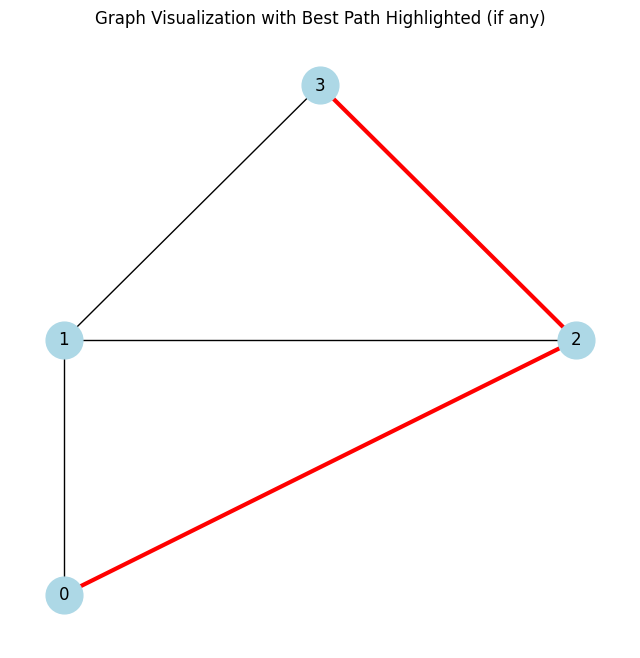

In [16]:
graph.visualize(path)